In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import urllib.request
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq(hl='en-GB', tz=0)

class Trend:
    def __init__(self, keyword, timeframe, data_url):
        self._keyword = keyword
        self._timeframe = timeframe
        self._data_url = data_url

        self._api_df = None
        self._user_df = None

        self._api_row_count = None
        self._user_row_count = None
        self._user_col_count = None

        self.get_api_data()
        self.parse_api_df()
        self.parse_data_url()

    def get_api_data(self):
        pytrends.build_payload(kw_list=[self._keyword], timeframe=[self._timeframe])
        self._api_df = pytrends.interest_over_time()
    
    def parse_api_df(self):
        self._api_df[self._keyword] = self._api_df[self._keyword] / 100
        self._api_df = self._api_df.reset_index()
        self._api_df['user_values'] = np.nan
        self._api_row_count = len(self._api_df)
    
    def parse_data_url(self):
        image_data = urllib.request.urlopen(self._data_url)
        image = Image.open(image_data).convert('L')
        data = np.array(image)

        self._user_df = pd.DataFrame(data)
        self._user_row_count = len(self._user_df)
        self._user_col_count = len(self._user_df.columns)
    
    def calculate_score(self):
        relevant = self._user_df[self._user_df.columns[self._user_df.mean(axis=0) > 0]]
        
        for column_idx in relevant:
            line_values = self._user_df[column_idx][self._user_df[column_idx] != 0]

            if len(line_values) > 0:
                corresponding_row = int(column_idx / self._user_col_count * self._api_row_count)
                mean = (self._user_row_count - line_values.index.values.mean()) / self._user_row_count
                self._api_df.at[corresponding_row, 'user_values'] = mean

        # self._api_df['user_values'] = self._api_df['user_values'].interpolate(method='linear', axis=0)

        # if self._api_df['user_values'].isnull().values.any():
        #     self._api_df['user_values'] = self._api_df['user_values'].bfill(axis=0)
        #     self._api_df['user_values'] = self._api_df['user_values'].ffill(axis=0)

        self._api_df['difference'] = np.square((self._api_df['user_values'] - self._api_df[self._keyword]))
        self._api_df['difference'] = self._api_df['difference'].fillna(value=1, axis=0)

        mean_squared_error = (self._api_df['difference'].sum()) / self._api_row_count
        return (1 - mean_squared_error) * 100
    
    def visualise_result(self):
        self._api_df['user_values'].plot()
    
    def visualise_api(self):
        self._api_df[self._keyword].plot()



c:\Users\Python\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


<Axes: xlabel='date'>

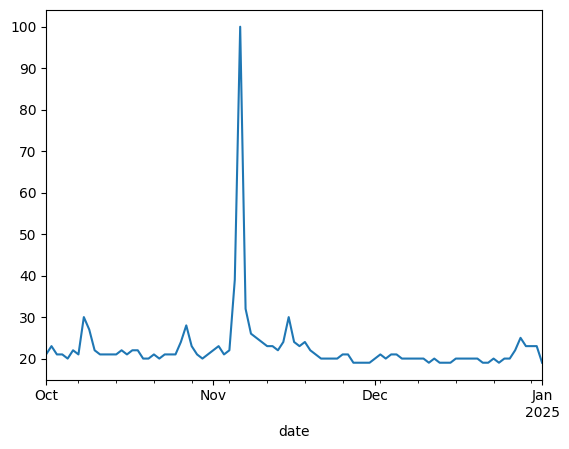

In [3]:

pytrends.build_payload(kw_list=['robert'], timeframe=['today 3-m'])
df = pytrends.interest_over_time()
df['robert'].plot()

In [35]:
pd.set_option('display.max_rows', 500)
trend._api_df['mega']

0     0.09
1     0.12
2     0.10
3     0.12
4     0.11
5     0.11
6     0.10
7     0.09
8     0.11
9     0.09
10    0.11
11    0.13
12    0.10
13    0.10
14    0.09
15    0.12
16    0.12
17    0.10
18    0.12
19    0.13
20    0.10
21    0.10
22    0.12
23    0.10
24    0.12
25    0.12
26    0.12
27    0.11
28    0.10
29    0.14
30    0.12
31    0.14
32    0.16
33    0.11
34    0.10
35    0.11
36    0.14
37    0.12
38    0.16
39    0.15
40    0.17
41    0.11
42    0.10
43    0.12
44    0.11
45    0.10
46    0.12
47    0.12
48    0.10
49    0.10
50    0.13
51    0.11
52    0.11
53    0.12
54    0.17
55    0.12
56    0.10
57    0.13
58    0.10
59    0.13
60    0.13
61    0.13
62    0.11
63    0.11
64    0.15
65    0.11
66    0.12
67    0.14
68    0.14
69    0.11
70    0.11
71    0.16
72    0.13
73    0.14
74    0.16
75    0.13
76    0.13
77    0.15
78    0.22
79    0.15
80    0.14
81    0.21
82    0.14
83    0.14
84    0.18
85    0.36
86    0.23
87    0.26
88    0.57
89    0.21
90    0.26

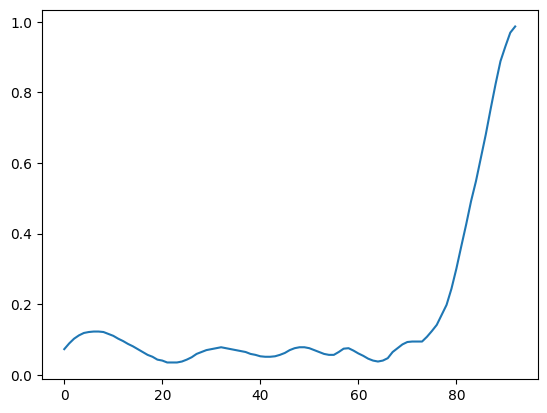

In [36]:
trend.visualise_result()

In [9]:
trend.visualise_api()